In [2]:
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt
import numpy as np

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

# Binomial Distribution

* A single success/failure experiment is called a **Bernoulli trial**.
* The binomial distribution assumed the N trials are done with replacement, thus making each experiment independent.
  * If the experiments are not with replacement, then each successive trial is not independent of the others and the resulting distribution is **hypergeometric**.
  * If $N >> n$, then the binomial distribution remains a good approximation.
* If the **random variable** $X$ follows the binomial distribution then we say $X \sim B(n, p)$.
* The probability of $k$ successes in $n$ independent Bernoulli trials is given by the **probability mass function**:

$$
f(k, n, p) = P(X=k) = {n \choose k} p^k \left( 1- p \right)^{n-k}
$$

* The **cummulative distribution function** is given by

$$
F(k; n, p) = P(X \leq k)
$$

In [3]:
n, p = 5, 0.85
mean, var, skew, kurt = binom.stats(n, p, moments="mvsk")
print(f"mean: {mean:8.5f}\nvar: {var:8.5f}\nskew: {skew:8.5f}\nkurt: {kurt:8.5f}")

mean:  4.25000
var:  0.63750
skew: -0.87671
kurt:  0.36863


In [3]:
k = 3
n, p = 5, 0.85
binom.pmf(k, n, p) # probability of finding k out of n with probability p for each.
# Answer: 0.1382

0.13817812499999993

The CDF is given by $F_{X} (x) : \mathbf{R} \rightarrow [0,1]$ and is continuous and strictly monotonic.

The quantile function (ppf) $Q : [0,1] \rightarrow \mathbf{R}$ maps the input $p$ to a threshold value $x$
so that the probability of $X$ being less or equal than $x$ is p.

$$
F_{X} (x) = P(X \leq x) = p
$$

and 
$$
Q(p) = F^{-1}_{X} (p)
$$


In [4]:
# Percent point function - inverse of CDF
# the quantile function outputs the **value of a random variable** such that its probability
# is less than or equal to an input probability value
binom.ppf(0.138, n, p)

3.0

In [6]:
# The CDF is P(X \leq x)
# The survival function is P(X > x) = 1 - CDF

n, k, p = 460, 251, 0.5

cdf = binom.cdf(k, n, p) # k or less successes.
sf = binom.sf(k, n, p) # probability of more than k successes.

print(f"cdf [P(X <= x)]: {cdf:8.5f}\nsf [P(X > x)]: {sf:8.5f}")
print(f"sf = 1 - cdf [1 - P(X <= x)]: {1-cdf:8.5f}")
# CDF = 0.97757, SF = 0.02243 (1-CDF)

cdf [P(X <= x)]:  0.97757
sf [P(X > x)]:  0.02243
sf = 1 - cdf [1 - P(X <= x)]:  0.02243


ppf(0.01) = 2.0
ppf(0.99) = 5.0
range = [2. 3. 4.]


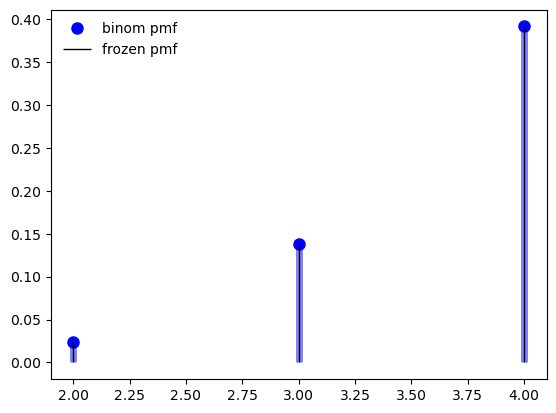

In [10]:
n, p = 5, 0.85

x_min = binom.ppf(0.01, n, p)
x_max = binom.ppf(0.99, n, p)
x = np.arange(
    x_min,
    x_max,
)
print(f"ppf(0.01) = {x_min}")
print(f"ppf(0.99) = {x_max}")
print(f"range = {x}")

fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label="binom pmf")
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label="frozen pmf")

ax.legend(loc='best', frameon=False)
fig.show()

# Poisson Distribution

In [17]:
avg_hurricanes_per_yr = 336 / 55 # 55yr period since 1960 had 336 Atlantic hurricanes.

k = 8
p_k_per_year = poisson.pmf(k, avg_hurricanes_per_yr)
print(f"P(8) = {p_k_per_year:.5f}")
# Expected number of years with 8 hurricanes per year is = 55 yrs * 0.10694

P(8) = 0.10694
